In [17]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Global Earthquakes

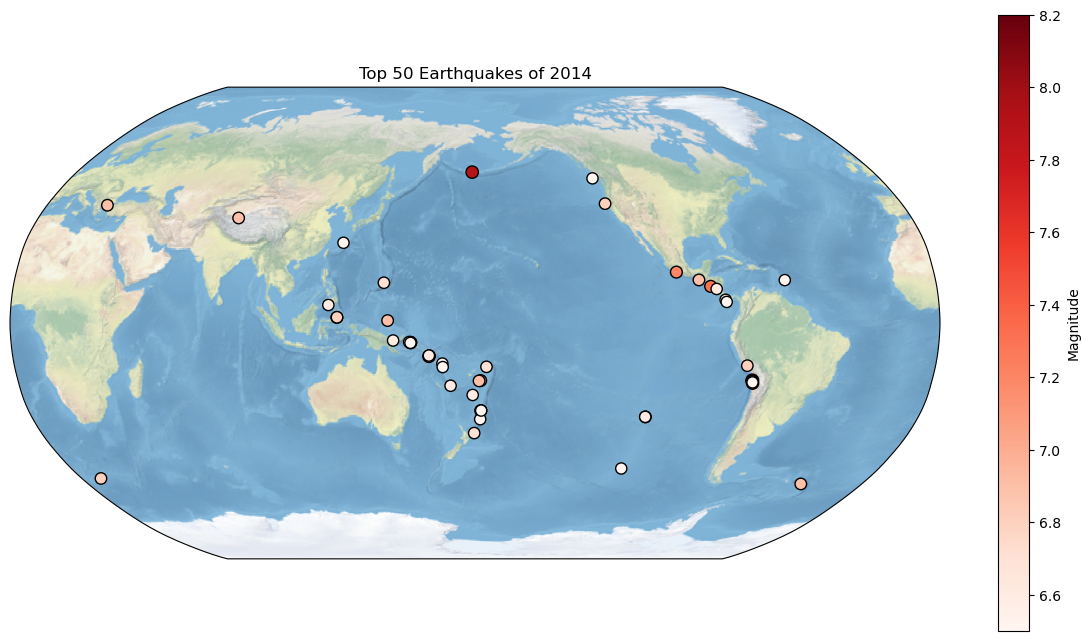

In [67]:
earthquakes = pd.read_csv("usgs_earthquakes.csv")
#largest
earthquakes_max = earthquakes.nlargest(50, 'mag')
#map
plt.figure(figsize=(15, 8)) 
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))#rotation
ax.set_global()
#add background
ax.stock_img()
#earthquake location
scatter = plt.scatter(
    earthquakes_max['longitude'],  
    earthquakes_max['latitude'],   
    c=earthquakes_max['mag'],      
    cmap='Reds',                          
    s=earthquakes_max['mag'] * 10, 
    edgecolor='black',                   
    transform=ccrs.PlateCarree()          
)
#intensity-colorbar
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.05) 
cbar.set_label('Magnitude') 
plt.title('Top 50 Earthquakes of 2014', fontsize=12) 

plt.show()

# 2.Explore a netCDF dataset

In [56]:
#dataset same as Assignment03
CH4=xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
#methane=CH4['xch4']
#methane
methane = CH4['xch4'].mean(dim='time')

In [57]:
methane

<xarray.DataArray 'xch4' (lat: 36, lon: 72)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [1.7319782e-06, 1.7372315e-06, 1.7349937e-06, ..., 1.7301534e-06,
        1.7371364e-06, 1.7258259e-06],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5

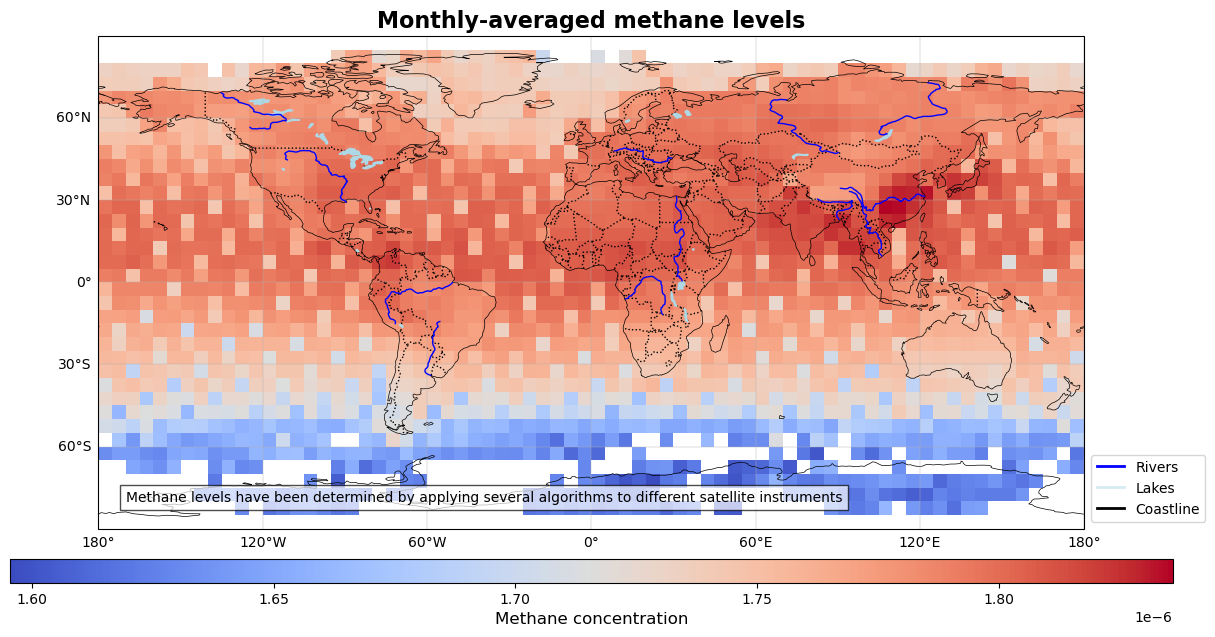

In [78]:
#2.1 global map
#map
plt.figure(figsize=(15, 8))  
ax = plt.axes(projection=ccrs.PlateCarree())  
ax.set_global()
# add background and boundary
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1.0)  
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)  
lakes = ax.add_feature(cfeature.LAKES, edgecolor='lightblue', facecolor='lightblue', zorder=2)
rivers = ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)
#add CH4 information
CH4_plot = plt.pcolormesh(
    methane['lon'], methane['lat'], methane,
    transform=ccrs.PlateCarree(), cmap='coolwarm',shading='auto')
#color bar
cbar = plt.colorbar(CH4_plot, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Methane concentration', fontsize=12)

#gridlines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.3)
gl.top_labels = False
gl.right_labels = False
#title and axis label and ticks
plt.title('Monthly-averaged methane levels', fontsize=16, weight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
#legend
legend_elements = [
    plt.Line2D([0], [0], color='blue', lw=2, label='Rivers'),
    plt.Line2D([0], [0], color='lightblue', lw=2, label='Lakes', alpha=0.5),
    plt.Line2D([0], [0], color='black', lw=2, label='Coastline')
]
ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(1, 0), fontsize=10)
# annotations and textbox
plt.text(-170, -80, 'Methane levels have been determined by applying several algorithms to different satellite instruments', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

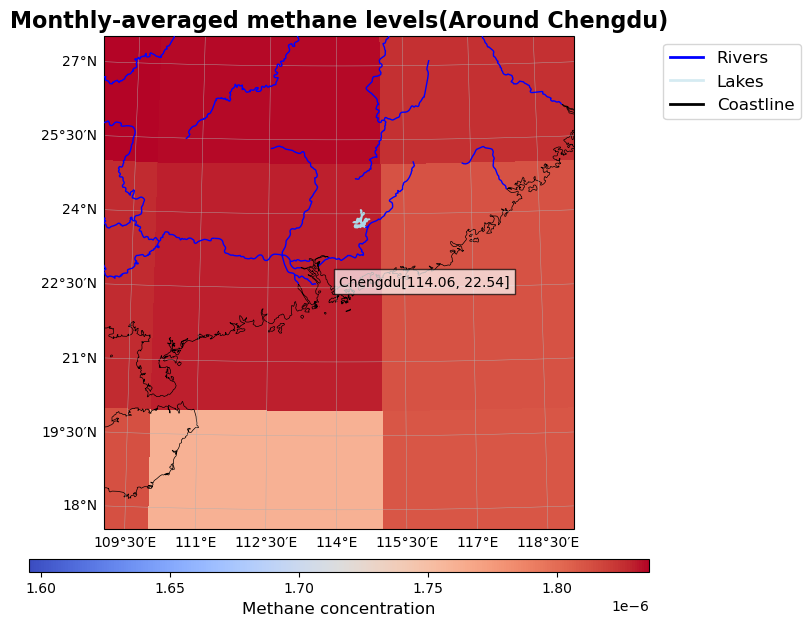

In [77]:
#2.1 regional map around Chengdu,China
central_lon, central_lat = 114.06, 22.54
extent = [central_lon - 5, central_lon + 5, central_lat - 5, central_lat + 5]  
#map with different projection
plt.figure(figsize=(8, 8), dpi=100)
proj = ccrs.Orthographic(central_lon, central_lat)
ax = plt.axes(projection=proj)
ax.set_extent(extent, crs=ccrs.PlateCarree())

###same as above
# add background and boundary
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1.0)  
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)  
lakes = ax.add_feature(cfeature.LAKES, edgecolor='lightblue', facecolor='lightblue', zorder=2)
rivers = ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)
#add CH4 information
CH4_plot = plt.pcolormesh(
    methane['lon'], methane['lat'], methane,
    transform=ccrs.PlateCarree(), cmap='coolwarm',shading='auto')
#color bar
cbar = plt.colorbar(CH4_plot, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Methane concentration', fontsize=12)

#gridlines
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linewidth=0.3)
gl.top_labels = False
gl.right_labels = False
#title and axis label and ticks
plt.title('Monthly-averaged methane levels(Around Chengdu)', fontsize=16, weight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
#legend
legend_elements = [
    plt.Line2D([0], [0], color='blue', lw=2, label='Rivers'),
    plt.Line2D([0], [0], color='lightblue', lw=2, label='Lakes', alpha=0.5),
    plt.Line2D([0], [0], color='black', lw=2, label='Coastline')
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.5, 1.0), fontsize=12)
# annotations and textbox
plt.text(114.06, 22.54,'Chengdu[114.06, 22.54]', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.show()